# Chapter 5
- Visualizations provided by https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb

## Linear SVM

In [120]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64) #Iris Virginica

In [9]:
print(str(X) + str(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [4]:
#SVM pipeline
svm_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')) #‘hinge’ is the standard SVM loss (used e.g. by the SVC class)
])

In [5]:
svm_classifier.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [10]:
print(svm_classifier.predict([[5.5, 1.7]]))
print(svm_classifier.predict([[1.4, 0.5]]))

[1.]
[0.]


### Using the SVC class

In [11]:
#SVM pipeline
svm_clf_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1)) #‘hinge’ is the standard SVM loss (used e.g. by the SVC class)
])

In [12]:
svm_clf_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [13]:
print(svm_clf_svc.predict([[5.5, 1.7]]))
print(svm_clf_svc.predict([[1.4, 0.5]]))

[1.]
[0.]


## Non-linear SVM
- For non-linearly separable data
- Can be handled in the following ways:
    - Adding Polynomial Features
    - Add features using a similarity function

### Using Polynomial Features and a linear SVC

In [4]:
X,y = make_moons(n_samples=100, noise=0.15) #Make two interleaving half circles
poly_svm_classifier = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge'))
])

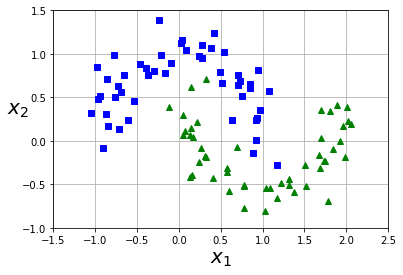

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
poly_svm_classifier.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

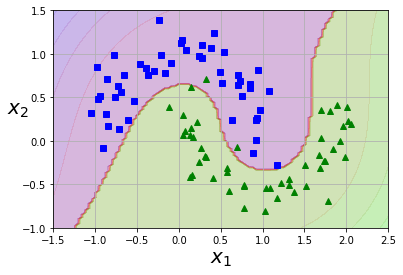

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #Return evenly spaced numbers over a specified interval.
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #Return coordinate matrices from coordinate vectors.
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_classifier, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Polynomial Kernel
- Kernel trick: Get the same results as that when polynomial features are added, without actually having to add them
- coef0 in SVC controls how much the model is influenced by high-deg polynomials vs low-deg polynomials

In [13]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [15]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [17]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])

In [18]:
poly100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

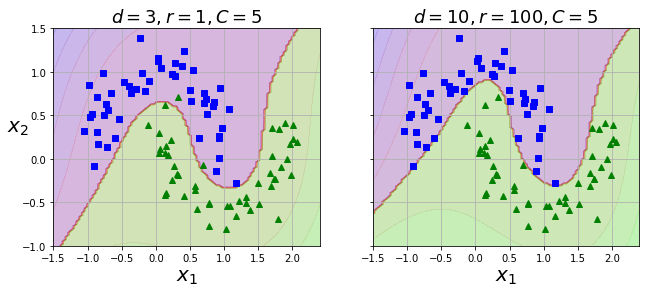

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

## Similarity Features
- Measures how much each instance resembles a landmark.
- Using a Gaussian Radial Basis function
    - Bell shaped function with 0 being far away from the landmark and 1 being at the landmark
- Selection of landmarks
    - Rule of thumb: Create landmark at the location of each and every instance in the dataset
    - This creates many dimensions and augments the chances that the transformed training set will be linearly separable
    - DISADVANTAGE:
        - Computationally heavy for large datasets because training set with m examples and n features becomes m examples with m features(if we drop original features)

## Gaussian RBF Kernel

In [21]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

In [22]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

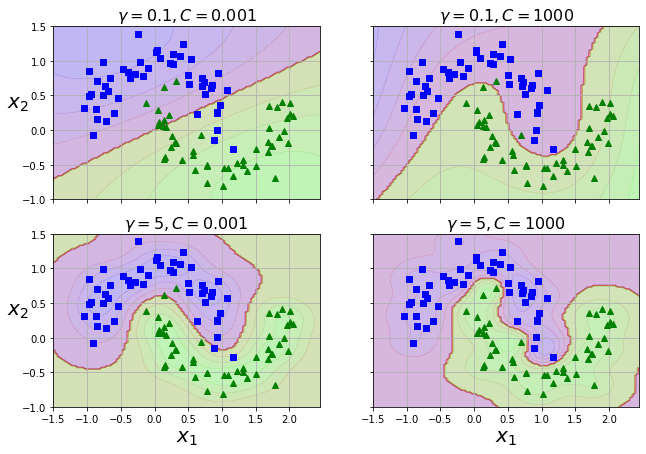

In [24]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

- How to choose Kernels:
    - Rule of Thumb: Go for a linear kernel first. LinearSVC is much faster than SVC(kernel='linear') IF training set is very large and it has plenty of features
    - If training set is not too large, try the RBF kernel.
- Computational Complexity:
    - LinearSVC
        - It does not support the kernel trick (READ: SVC(kernel='poly')).
        - Training time: O(m x n)
        - Algo takes longer if very high precision is demanded. Controlled by the tol(epsilon) parameter
    - SVC()
        - Supports kernel trick
        - Training time: O($m^{2}$ x n) and O($m^{3}$ x n)
        - Largely dependent on the size of the training set so as the size increases time increases as well. Will perform poorly on large datasets
        - Best suited for complex small or medium size datasets

## SVM Regression

- SVM Classification objective: Fit the largest possible street between two classes while limiting margin violations
- SVM Regression objective: Fit as many instances as possible ON the street while limiting margin violations(i.e instances off the street)
    - Width is controlled by epsilon parameter.
    - Greater margin with higher epsilon value
    - Adding more training instances within the margin does not affect the model's predictions; Thus the model is said to be epsilon insensitive. 

In [26]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [28]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) #HValue of C is inversely proportional to strength of regularization
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## EXERCISES

- Q8. Train a LinearSVC on a linearly separable dataset. Then train SVC and SGDClassifier on the same dataset and see if you can produce the same model

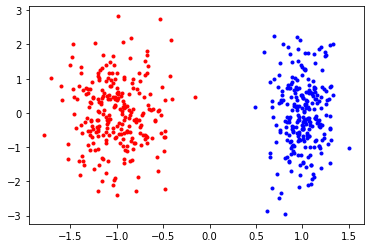

In [41]:
#Create linearly separable dataset
separable = False
while not separable:
    samples = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [43]:
#samples
X, y = samples[0], samples[1]
svm_clf_q8 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=1, loss='hinge'))
])
svm_clf_q8.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [44]:
svm_clf_svc_q8 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_clf', SVC(kernel='linear', C=1)) #‘hinge’ is the standard SVM loss (used e.g. by the SVC class)
])
svm_clf_svc_q8.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc_clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [63]:
C = 1
alpha = 1 / (C * len(X))
svm_clf_sgd_q8 = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, alpha=alpha)) #‘hinge’ is the standard SVM loss (used e.g. by the SVC class)
])
svm_clf_sgd_q8.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_clf',
                 SGDClassifier(alpha=0.002, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [64]:
print('LinearSVC: ' + str(svm_clf_q8.named_steps['svm_clf'].coef_) + str(svm_clf_q8.named_steps['svm_clf'].intercept_))
print('SVC: ' + str(svm_clf_svc_q8.named_steps['svc_clf'].coef_) + str(svm_clf_svc_q8.named_steps['svc_clf'].intercept_)) 
print('SGDClassifier: ' + str(svm_clf_sgd_q8.named_steps['sgd_clf'].coef_) + str(svm_clf_sgd_q8.named_steps['sgd_clf'].intercept_))

LinearSVC: [[ 1.91959209 -0.01382149]][-0.20442367]
SVC: [[ 1.91983748 -0.01375065]][-0.2044762]
SGDClassifier: [[2.16941130e+00 6.44826358e-04]][-0.13244187]


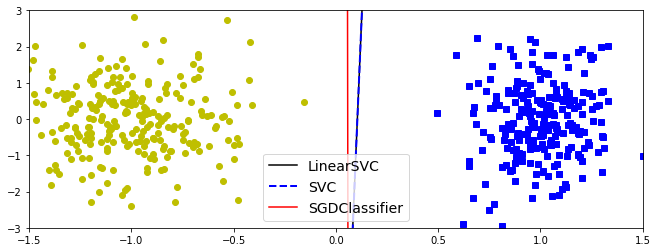

In [65]:
# Compute the slope and bias of each decision boundary
w1 = -svm_clf_q8.named_steps['svm_clf'].coef_[0, 0]/svm_clf_q8.named_steps['svm_clf'].coef_[0, 1]
b1 = -svm_clf_q8.named_steps['svm_clf'].intercept_[0]/svm_clf_q8.named_steps['svm_clf'].coef_[0, 1]
w2 = -svm_clf_svc_q8.named_steps['svc_clf'].coef_[0, 0]/svm_clf_svc_q8.named_steps['svc_clf'].coef_[0, 1]
b2 = -svm_clf_svc_q8.named_steps['svc_clf'].intercept_[0]/svm_clf_svc_q8.named_steps['svc_clf'].coef_[0, 1]
w3 = -svm_clf_sgd_q8.named_steps['sgd_clf'].coef_[0, 0]/svm_clf_sgd_q8.named_steps['sgd_clf'].coef_[0, 1]
b3 = -svm_clf_sgd_q8.named_steps['sgd_clf'].intercept_[0]/svm_clf_sgd_q8.named_steps['sgd_clf'].coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = svm_clf_q8.named_steps['scaler'].inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = svm_clf_q8.named_steps['scaler'].inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = svm_clf_q8.named_steps['scaler'].inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.legend(loc="best", fontsize=14)
plt.axis([-1.5, 1.5, -3, 3])

plt.show()

- Q.10 Train an SVM regressor on the California Housing dataset

In [67]:
X, y = fetch_california_housing(return_X_y=True)

In [76]:
print(X.shape, y.shape)
# for i, j in zip(X,y):
#     print(i, j)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20640, 8) (20640,)
(16512, 8) (4128, 8) (16512,) (4128,)


#### LinearSVC pipeline

In [85]:
svm_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm_reg', LinearSVR(epsilon=0, C=1, random_state=42, max_iter = 3000))
])

In [95]:
#Performing cross validation on the training set
cv_scores = cross_val_score(svm_reg, X, y, cv=5, scoring='neg_mean_squared_error')

In [96]:
cv_scores

array([ -1.4698348 ,  -0.66830409,  -0.68244921,  -0.61173609,
       -12.57568036])

In [97]:
svm_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_reg',
                 LinearSVR(C=1, dual=True, epsilon=0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=3000, random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [100]:
y_test_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
print(np.sqrt(mse))

0.5836087698787628
0.7639429100912991


#### Playing with an SVR pipeline
    - Pipeline and GridSearch tip: The '__' indicates which parameter corresponds to which step of the pipeline.

In [131]:
#SVR pipeline
svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr_q10', SVR(kernel='rbf'))
])
parameters = {
    'svr_q10__C':[5, 50, 100]
}
grid_svr_clf = GridSearchCV(svr_pipe, parameters, scoring='neg_mean_squared_error', verbose=2)
grid_svr_clf.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] svr_q10__C=5 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... svr_q10__C=5, total=  16.4s
[CV] svr_q10__C=5 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s


[CV] ..................................... svr_q10__C=5, total=  15.9s
[CV] svr_q10__C=5 ....................................................
[CV] ..................................... svr_q10__C=5, total=  15.9s
[CV] svr_q10__C=5 ....................................................
[CV] ..................................... svr_q10__C=5, total=  17.2s
[CV] svr_q10__C=5 ....................................................
[CV] ..................................... svr_q10__C=5, total=  17.1s
[CV] svr_q10__C=50 ...................................................
[CV] .................................... svr_q10__C=50, total=  54.5s
[CV] svr_q10__C=50 ...................................................
[CV] .................................... svr_q10__C=50, total=  54.1s
[CV] svr_q10__C=50 ...................................................
[CV] .................................... svr_q10__C=50, total=  55.5s
[CV] svr_q10__C=50 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 14.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svr_q10',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'svr_q10__C': [5, 50, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring

In [132]:
grid_svr_clf.best_params_

{'svr_q10__C': 50}

In [133]:
y_test_pred_svr = grid_svr_clf.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred_svr)
print(mse)
print(np.sqrt(mse))

0.31628353833697526
0.5623909123883273


- Q9. SVM CLF on MNIST